### Iterative code for Z_score to identify outliers

In [1]:
import pandas as pd
import numpy as np
import statsmodels as stats
import matplotlib.pyplot as plt
                        
                        

In [ ]:
## iterative method

# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data)


colorz = 'brkm'
numiters = 0 # iteration counter
while True:
    
    # convert to z
    datamean = np.nanmean(dataZ)
    datastd  = np.nanstd(dataZ)
    dataZ = (dataZ-datamean) / datastd
    
    # find data values to remove
    toremove = dataZ>zscorethresh
    
    # break out of while loop if no points to remove
    if sum(toremove)==0:
        break
    else:
        # otherwise, mark the outliers in the plot
        plt.plot(np.where(toremove)[0],dataZ[toremove],'%sx'%colorz[numiters],markersize=12)
        dataZ[toremove] = np.nan
    
    # replot
    plt.plot(dataZ,'k^',markersize=12,markerfacecolor=colorz[numiters],label='iteration %g'%numiters)
    numiters = numiters + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()

#### the data points to be removed
removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

### z_score method for multivariate data 

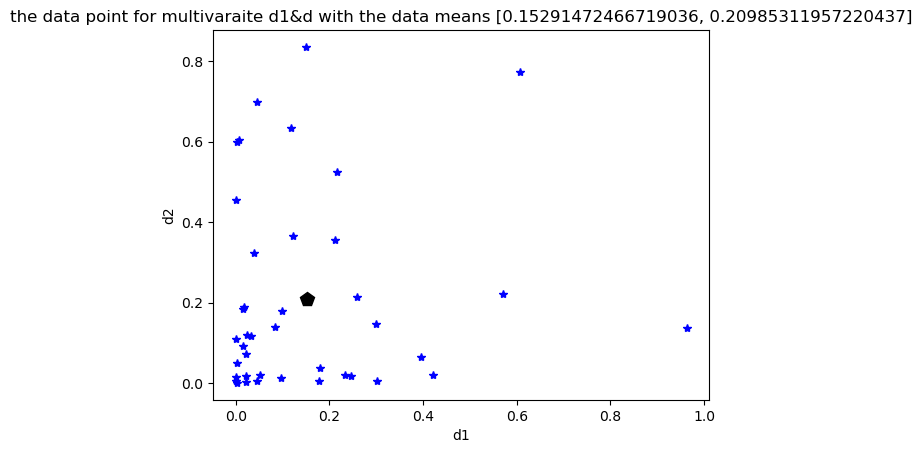

In [16]:
#create data and plot  it 
n = 40    

d1 =np.exp(-abs(np.random.randn(n))*5)
d2 =np.exp(-abs(np.random.randn(n))*3)

datamean = [np.mean(d1), np.mean(d2)]

plt.plot(d1,d2, 'b*')
plt.plot(datamean[0],datamean[1],'kp', markersize= 10)
plt.xlabel('d1')
plt.ylabel("d2")
plt.title(f"the data point for multivaraite d1&d with the data means {datamean}")
plt.show()

In [18]:
#let's calculate the ecludien distance (the distance between mean and othes data point)

ds = np.zeros(n)

for i in range(n):
    ds[i]=np.sqrt((d1[i]-datamean[0])**2 + (d2[i]-datamean[1])**2)
    

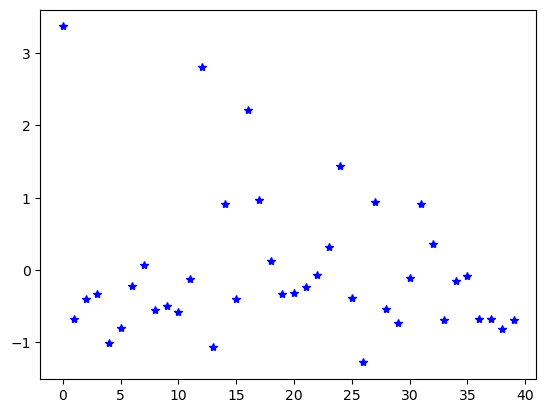

In [22]:
#let's convert the distance to z_score:
zds = ( (ds - np.mean(ds))/np.std(ds) )

#plot zds

plt.plot(zds,'b*')
plt.show()

In [27]:
#threshold 
distancetrish = 2.5

oidx = np.where(zds > distancetrish)[0]

print(oidx)

[ 0 12]


### PROBABILITY

In [4]:
c = np.array([1,2.7,3,4])
proba = (100*c)/sum(c)
print(proba)
    

[ 9.34579439 25.23364486 28.03738318 37.38317757]


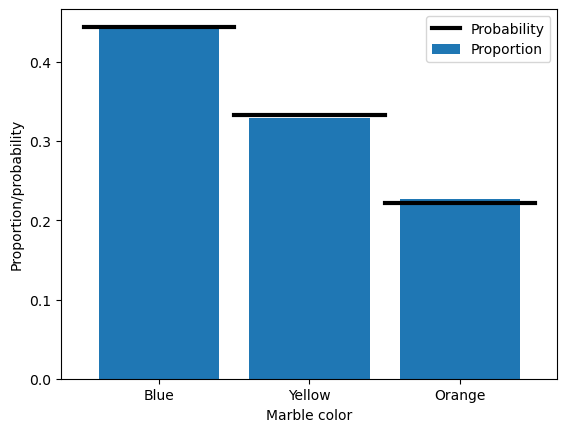

In [29]:
blue = 40
yellow = 30
orange = 20
tatal = blue+yellow+orange

jar = np.hstack((1*np.ones(blue),2*np.ones(yellow),3*np.ones(orange)))

# now we draw 500 marbles (with replacement)
numDraws = 4530
drawColors = np.zeros(numDraws)

for drawi in range(numDraws):
    
    # generate a random integer to draw
    randmarble = int(np.random.rand()*len(jar))
    
    # store the color of that marble
    drawColors[drawi] = jar[randmarble]
# now we need to know the proportion of colors drawn
propBlue = sum(drawColors==1) / numDraws
propYell = sum(drawColors==2) / numDraws
propOran = sum(drawColors==3) / numDraws


# plot those against the theoretical probability
plt.bar([1,2,3],[ propBlue, propYell, propOran ],label='Proportion')
plt.plot([0.5, 1.5],[blue/tatal, blue/tatal],'k',linewidth=3,label='Probability')
plt.plot([1.5, 2.5],[yellow/tatal,yellow/tatal],'k',linewidth=3)
plt.plot([2.5, 3.5],[orange/tatal,orange/tatal],'k',linewidth=3)

plt.xticks([1,2,3],labels=('Blue','Yellow','Orange'))
plt.xlabel('Marble color')
plt.ylabel('Proportion/probability')
plt.legend()
plt.show()

In [18]:
jar

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.])